# <center> Lecture 6: Importance Sampling</center>

Let's start with a simple problem. Consider a Gaussian distribution
$$p(x)=\frac{1}{\sqrt{2 \pi}}e^{-\frac{(x-c)^2}{2}} $$
with $c=20$ and compute the probability that $x$ is negative. Using your favourite integration method you will find that
$$ \text{Proba}(x<0)=\int_{-\infty}^0 d x p(x) \sim 2.75\cdot 10^{-89} $$
Is it  possible to compute this integral using stochastic methods which, at variance of the deterministic ones, can be generalized in high dimensions?



### Rari nantes in gurgite vasto

A very bad strategy is the direct sampling of $x_1, x_2, \ldots, x_{N_{\text{trials}}}$ as for each example $x_i$ the observable is either one (if $x_i<0$) either zero (if $x_i>0$). The $ \text{Proba}(x<20)$ is a very small number determined by the tiny fraction of 1 ("rari nantes") appearing in a large sea of zeros. In these conditions the fluctuations of the observable $O_i$ are extremly large compare to mean value. 

* To get a feeling compute the $N_{\text trials}$ you need in order to compute the integral with a $1 \%$ precision. This calculation shows that the standard deviation associated to the observable (i.e. the probability to observe a negative $x$)  is very large compared to the mean value. 

This sittuation is quite general and occurs when typical examples provide a modest contribution to the  observable that is totally determined by some rare, yet important, example. In these cases we have hard time with Monte Caro methods and even our favorite direct sampling can fail miserably.



## Importance sampling strategy

To succeed in our numerical problem we need to bias our sampling and propose the important configurations for the observable and not the typical ones. This idea is called importance sampling and is based on this equation.

$$ \langle O \rangle_p = \int d x p(x) O(x) =\int d x q(x) \frac{p(x)}{q(x)}  O(x)= \langle w(x) O(x)\rangle_q$$

Here we should define two objects: (i) the bias $q(x)$ that is the distribution that we use in our Monte Carlo (ii) the weight $w(x)=p(x)/q(x)$ which tell us how to re-weight the observable in order to compensate the bias. 

The final goal is that our estimation
$$ \langle O \rangle_p \approx \frac{1}{N_{\text{trials}}}\, \sum_{i=1}^{N_{\text{trials}}} O(x_i) w(x_i) \quad \text{ with $x_i$ drawn from $q(x)$}$$
is more accurate then the one obtained by direct sampling of $p(x)$.



## Exponential tilting

A particular and useful class of bias are the exponential tilting defined by
$$q(x)=\frac{e^{t x}}{\langle e^{t x}\rangle_p} p(x) \quad \text{and} \quad w(x)=e^{-t x}\langle e^{t x}\rangle_p  $$
Note that 
* the normalization constant $\langle e^{t x}\rangle_p$ is the moment generating function of $p(x)$. For our problem we have:
$$ \langle e^{tx}\rangle_p= e^{c t +t^2/2}$$
*$t$ is the adjustable parameter

 * Compute $q(x)$ and $w(x)$ using exponential tilting
$$q(x)= \frac{1}{\sqrt{2 \pi}} e^{-(x-(c+t))^2/2}$$
$$w(x)= e^{(c-x)t + t^2/2} $$
 * write a program to compute the probability

In [5]:
import random,math,numpy
c = 20
t = -18
Ntrials=10000
xsum=[]
for i in range(Ntrials):
    dx = random.gauss(c+t,1.)
    if dx < 0:
        num  = (c-dx)*t + t**2/2
        x= math.exp(num)
    else:
        x=0
    xsum.append(x)
xerror = numpy.std(numpy.array(xsum))
xm = numpy.mean(numpy.array(xsum))
print ('simulation', xm,'+/-', xerror/float(Ntrials)**0.5)

simulation 2.523713119419408e-89 +/- 3.5996237626863882e-90


## Two applications for importance sampling

### Application 1: Risk evaluation (to do if you  have time)  

Let us consider an insurance company starting with some initial capital $b$. The business earns money due to the premiums, but has to face claims. Premiums arrive at constant rate, while claims arrive at random times with random magnitudo. If at any time $t>0$ the surplus level becomes negative, the company fails. Is it possible to evaluate the probability $P(b)$ that company goes bankrupt? 
Modern risk theory goes back to the works of Filip Lundberg and Harald Cramér. They developed quantitative approaches to evaluate the ruin probability. Here we consider a variant of the original model where the surplus level is a random walk evolving at discrete time $\tau=0,1,2,\ldots$. 

We call $x(\tau)$ the surplus level at time $\tau$. We know that $x(0)=b$ and suppose the following evolution:

$$ x(\tau)=x(\tau-1) +\xi_\tau$$

Here $\xi_1,\xi_2, \ldots, \xi_\tau$ are iid Gaussian random numbers with

$$ \langle \xi_i\rangle =c,\quad \quad \langle \left(\xi_i-c \right)^2\rangle=1 \quad \text{for} \; i=1,2,\ldots$$

The company has a potential success only if $c>0$, but this is not sufficient to prevent bankrupt.

How can we evaluate numerically the ruin probability $P(b)$ given $c$? 

 We have to face two problems:

(i) It is difficult to estimate the maximal time after which the fate of the insurance company should be considered as safe 
 
(ii) More importantly, for each example (i.e. each random walk) the observable is one if the path overcomes the origin and zero if it stays above. Then, for large values of b, the ruin probability is a very small number determined by the tiny fraction of 1 (the "rari nantes") appears in a "large sea" of zeros. In these conditions, direct sampling does not provide an accurate estimation of $P(b)$.

This problem can be solved using  the exponential tilting introduced for a single Gaussian varialble. In this problem each example is random walk and it is fully defined by the sequance of jumps. The probability of a random walk of $N$ steps is then 
$$ p(\{\xi_1,\xi_2,\ldots,\xi_N\}) = \prod_{i=1}^N \left(\frac{1}{\sqrt{2 \pi}} e^{-(\xi_i-c)^2/2}\right)$$

The hint  Introduce an exponential tilt $\exp(𝑡  \xi_i)$ for all $𝑖=1,…,𝑁$. By computing $q(\{\xi_1,\xi_2,\ldots,\xi_N\})$ you realize the $t=-2c$ is the better choice (not so simple). Sampling the jumps using this prescription allows you to give a very precise estimation of $P(b)$




### Application 2:  Fat tails 
 
We already considered the Pareto distribution
$$ \pi(\xi) = \frac{\alpha}{\xi^{\alpha+1}}\qquad \alpha \in (0,\infty).\qquad \langle{\xi}\rangle = \frac{\alpha}{\alpha-1}  \qquad \alpha \in (1,\infty)$$

We study here the case $\alpha=3/2$ and our goal is to estimate the average $\langle \xi\rangle =3$. In the program below we plot  the running average 



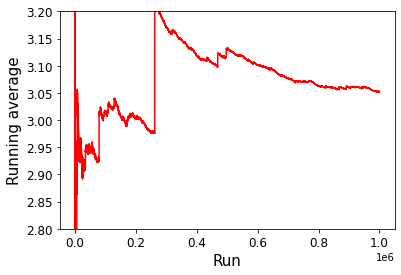

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
Ntrials = 1000000
alpha = 1.5
xmeanexact = alpha / (alpha - 1.)
xi = np.random.uniform(0,1,Ntrials)**(-1./alpha)
xisum = np.cumsum(xi)
run = np.arange(1,Ntrials+1)
xicontrol = np.divide(xisum,run)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Running average', fontsize=15)
plt.xlabel('Run', fontsize=15)
plt.ylim(xmeanexact-0.2, xmeanexact +0.2)
plt.plot(run,xicontrol, '-r')
plt.show()

Let's solve this problem using importance sampling. We are evaluating the integral
$$ \langle \xi\rangle = \int_1^\infty d \xi \, \xi\, \frac{3/2}{ \xi^{5/2}} $$
but the variance diverges... Indeed
$$  \int_1^\infty d \xi \, \xi^2\, \frac{3/2}{ \xi^{5/2}}=\infty $$
To solve this problem we should use bias $q(x) = \alpha_1/x^{\alpha_1+1}$ which re-weight the observale
 $$ O(\xi) w(\xi)= O(\xi) p(\xi)/q(\xi)= \xi \times \frac{3}{2 \alpha_1} \frac{\xi^{\alpha_1}}{\xi^{3/2}} \sim \xi^\beta$$
 with $\beta=\alpha_1-1/2$. The variance exists if 
$$-2 \beta +\alpha_1+1>1$$  

Let's try $\alpha_1=3/4$.

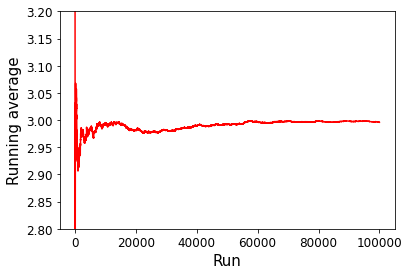

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
Ntrials = 100000
alpha=3./2.
alpha1 = 3./4.
xcst=alpha/alpha1
xexp=1+alpha1-alpha
xmeanexact = alpha / (alpha - 1.)
xi = np.random.uniform(0,1,Ntrials)**(-1./alpha1)
xireweight=xcst*(xi**xexp)
xisum = np.cumsum(xireweight)
run = np.arange(1,Ntrials+1)
xicontrol = np.divide(xisum,run)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Running average', fontsize=15)
plt.xlabel('Run', fontsize=15)
plt.ylim(xmeanexact-0.2, xmeanexact +0.2)
plt.plot(run,xicontrol, '-r')
plt.show()

## Self-normalized importance sampling

Sometimes instead the normalization is unkown and one use weights instead of probabilities. For example:
$$\langle O \rangle_p =\frac{\int d x O(x) p(x)}{\int d x p(x)}$$
In this case revious equations can be simply generalized
$$ \langle O \rangle_p  = \frac{\int d x q(x) \frac{p(x)}{q(x)}  O(x)}{\int d x q(x) \frac{p(x)}{q(x)} }= \frac {\langle w(x) O(x)\rangle_q}{\langle w(x)\rangle_q}$$

Again, the final goal is that our estimation
$$ \langle O \rangle_p \approx \, \frac{\sum_{i=1}^{N_{\text{trials}}} O(x_i) w(x_i)}{\sum_{i=1}^{N_{\text{trials}}}  w(x_i)} \quad \text{ with $x_i$ drawn from $q(x)$}$$
is more accurate then the one obtained by direct sampling of $p(x)$.

### Extreme random walks
Consider a symmetric random walk of $N=100$ steps. Each step is positive or negative with probability 1/2 and is drawn from a Pareto distribution with $\alpha=4$. The jumps have then 
$$\langle \xi\rangle =0 \quad \langle \xi^2 \rangle = 2$$
and the final position is
$$x_N=\sum_{i=1}^N \xi_i$$

The central limit theorem states that 
$$P(x_N)\approx \frac{1}{\sqrt{2 \pi \langle \xi^2 \rangle }} \exp\left( -\frac{x_N^2}{2 \langle \xi^2 \rangle N} \right)$$

However we observe strong deviation when $x_N$ is large. How can we sample the examples characterized by a very large value of $x_N$?


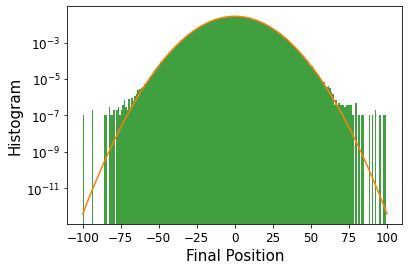

In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt
N_trials = 10000000
alpha = 4
N=100
all_pos = []
for sample in range(N_trials):
    xi = np.random.choice((-1, 1), N)*np.random.uniform(0,1,N)**(-1./alpha)
    xisum = np.sum(xi)
    all_pos.append(xisum)
p_gauss = lambda v: np.exp(-v**2/4/N)/np.sqrt(4*N*np.pi)
v_plot = np.linspace(-N, N)
plt.yscale('log')
plt.hist(all_pos, bins=range(-100,100,1), density=True, facecolor='g', alpha=0.75)  
plt.plot(v_plot, p_gauss(v_plot), label='Gauss')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Histogram', fontsize=15)
plt.xlabel('Final Position', fontsize=15)
plt.show()


Using Metropolis we can bias the value of $x_N$ to be large. For example with the weight
$$ q(x) \propto p(x) \times \exp(\beta x_N) $$

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt
N_trials = 10000
alpha = 4
beta=0.3
N=100
pfrac=0.05
all_pos = []
xi = np.random.choice((-1, 1), N)*np.random.uniform(0,1,N)**(-1./alpha)
xisum = np.sum(xi)
xinew = np.copy(xi)
#accept = [0 for i in range(N_trials)]
for sample in range(N_trials):
    for i in range(N):
        if (np.random.uniform(0,1)<pfrac):
           xinew[i] = np.random.choice((-1, 1))*np.random.uniform(0,1)**(-1./alpha) 
    xisumnew = np.sum(xinew)
    xidiff=xisumnew-xisum
    if (np.random.uniform(0,1)< np.exp(beta*xidiff)):
        xi= np.copy(xinew)
        xisum=xisumnew
    if (xisum>60):
       xiview1=np.array(xi)
       xiexample1=xisum   
    if  (xisum<20):
       xiview2=np.array(xi)
       xiexample2=xisum 
    all_pos.append(xisum)
time = np.arange(1,N+1)
plt.title('Example with x_N= '+str(round(xiexample1,2))+'', fontsize=15)
plt.ylabel('jumps', fontsize=15)
plt.xlabel('time', fontsize=15)
plt.plot(time,xiview, '-r')
plt.show()
plt.title('Example with x_N= '+str(round(xiexample2,2))+'', fontsize=15)
plt.ylabel('jumps', fontsize=15)
plt.xlabel('time', fontsize=15)
plt.plot(time,xiview2, '-b')
plt.show()


NameError: name 'xiexample1' is not defined